In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d prathamtripathi/regression-with-neural-networking

  0% 0.00/11.1k [00:00<?, ?B/s]
100% 11.1k/11.1k [00:00<00:00, 10.4MB/s]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,KBinsDiscretizer,Binarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

In [8]:
import zipfile

In [9]:
file = zipfile.ZipFile('/content/regression-with-neural-networking.zip','r')
file.extractall()
file.close()

In [10]:
df = pd.read_csv('/content/concrete_data.csv',usecols=['Cement','Water','Age','Strength'])

In [11]:
df.sample(5)

,Cement,Water,Age,Strength
510,424.0,178.0,7,39.00
543,255.0,192.0,7,10.22
491,387.0,157.0,7,36.84
89,439.0,186.0,3,39.30
954,150.7,166.7,28,13.46


In [100]:
df['Strength'] = np.where(df['Strength']>=np.median(df['Strength']),1.0,0.0)

In [101]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['Strength']),df['Strength'],test_size=0.2,random_state=42)

In [102]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape



((824, 3), (206, 3), (824,), (206,))

In [128]:
transformer = ColumnTransformer(transformers=[('tf1',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans'),['Age']),
                                              ('tf2',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans'),['Cement']),
                                              ('tf3',Binarizer(threshold=150.0,copy=False),['Water'])],
                                remainder='passthrough')
x_train_trans = transformer.fit_transform(x_train)
x_test_trans = transformer.transform(x_test)



/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_discretization.py:268: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [129]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trans,y_train)
y_pred = clf.predict(x_test_trans)
accuracy_score(y_test,y_pred)

0.8009708737864077

In [130]:
cross_val = cross_val_score(clf,x_train_trans,y_train,cv=10,scoring='accuracy')
cross_val.mean()

0.8202909197766678

In [134]:
x_train_trans = pd.DataFrame(x_train_trans,columns=['Cement','Age','Water'])
x_train_trans.describe()

,Cement,Age,Water
count,824.000000,824.000000,824.000000
mean,4.156553,5.774272,0.940534
std,2.414216,3.661234,0.236638
min,0.000000,0.000000,0.000000
25%,2.750000,3.000000,1.000000
50%,4.000000,6.000000,1.000000
75%,5.000000,8.000000,1.000000
max,13.000000,14.000000,1.000000


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


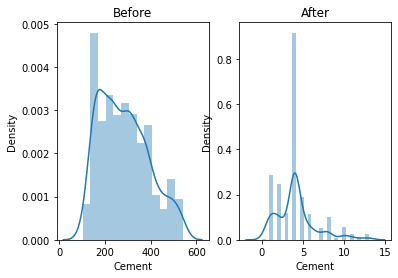

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


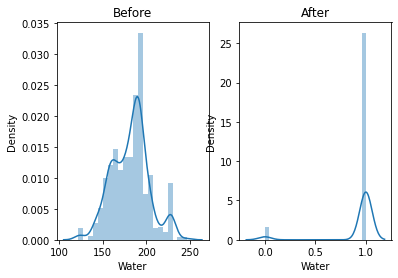

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


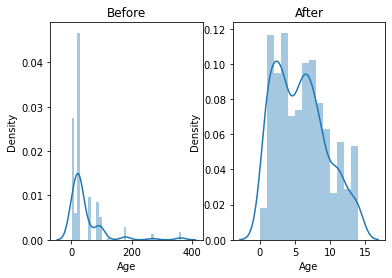

In [132]:
for col in x_train.columns:
  plt.subplot(121)
  plt.title('Before')
  sns.distplot(x_train[col])

  plt.subplot(122)
  plt.title('After')
  sns.distplot(x_train_trans[col])
  plt.show()